# 4.10 IC Coding Etiquette & Excel Reporting

This notebook contains the following-

## 1. Import the data set you exported in Exercise 4.9

## 2. Consider and address security implications.

## 3. Create a regional segmentation of the data.
3.1. Set up region column:

3.2. Creating a crosstab to compare spending habits in different U.S. regions:


## 4. Create an exclusion flag for low-activity customers and exclude them from the data. Make sure you export this sample.

## 5. Create profiling variables
5.1. Age

5.2 Income

5.3 Number of Dependents

## 6. Visualisations to show distributions of profiles
 6.1. Age Groups
 
 6.2. Income Groups

 6.3. Customers with Dependents

## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
7.1. Aggregations by Age Group

7.2. Aggregations by Income Group

7.3. Aggregations by Dependants Category


## 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.
8.1 Profile by Region

8.2 Profile by Department Sales

## 9. Visualisations.

## 10. Export Final Data Set

##  11. Supplementary Analysis
11.1. Are there certain types of products that are more popular than others?

11.2. Are there differences in ordering habits based on a customer's loyalty status?

11.3. "Are there differences in ordering habits based on a customer's region"?

11.4. What differences can you find in ordering habits of different customer profiles?


# 1. Import the data set you exported in Exercise 4.9

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os

In [2]:
# Set path
path = r'C:\Users\Sanket\Documents\MM-2020 Instacart Basket Analysis'

In [3]:
# Import data
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

# 2. Consider and address security implications.

In [4]:
#  Display all the columns of a DataFrame
pd.options.display.max_columns = None

In [5]:
# Check data for reminder of contents
ords_prods_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,first_name,surname,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,High-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,1,1,High-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,13,NaN,4,0,nan,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,14,6.0,1,1,nan,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
4,1000,Apricots,18,10,12.9,505689,138,prior,9,6,12,7.0,5,0,High-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both


In the previous exercise, we removed the first name and last name columns as they contained personally identifiable information (PII) and were not necessary for our subsequent analysis. While in a real-life scenario I would confirm with a senior colleague to ensure all security concerns are addressed, I believe that no additional columns need to be removed for privacy reasons at this stage.

# 3. Create a regional segmentation of the data.

## 3.1. Set up region column:

In [6]:
# To create the "Region" column, I'll begin by organizing the states into separate lists based on their respective regions:
northeast_region = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [7]:
midwest_region = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [8]:
south_region = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [9]:
west_region = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [10]:
# Create region column by assigning regions based on 'state' in each row:
ords_prods_all.loc[ords_prods_all['state'].isin(northeast_region), 'region'] = 'Northeast'

In [11]:
ords_prods_all.loc[ords_prods_all['state'].isin(midwest_region), 'region'] = 'Midwest'

In [12]:
ords_prods_all.loc[ords_prods_all['state'].isin(south_region), 'region'] = 'South'

In [13]:
ords_prods_all.loc[ords_prods_all['state'].isin(west_region), 'region'] = 'West'

In [14]:
# Checking data
ords_prods_all['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

## 3.2. Creating a crosstab to compare spending habits in different U.S. regions:

In [15]:
# create a crosstab between 'region' and 'spending_flag'
region_spending_crosstab = pd.crosstab(ords_prods_all['region'], ords_prods_all['spending_flag'], dropna = False)

In [16]:
# Could save to clipboard and open in Excel, but it should be a small table that can be viewed here
region_spending_crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


Spending habits are very similar between regions when looking at the proportions of customers in each region. The greatest proportion of 'High spender' customers was 2.10% in the South, whereas the lowest proportion of 'High spender' customers was 1.93% in the Northeast.



# 4. Create an exclusion flag for low-activity customers and exclude them from the data. Make sure you export this sample.

In [17]:
# Exclude customers where max_order is less than 5 
ords_prods_all.loc[ords_prods_all['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

In [18]:
# Keep customers where max_order is greater than or equal to 5
ords_prods_all.loc[ords_prods_all['max_order'] >= 5, 'exclusion_flag'] = 'Keep'

In [19]:
# Check table
ords_prods_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,first_name,surname,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region,exclusion_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,High-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Keep
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,1,1,High-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Keep
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,13,NaN,4,0,nan,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Keep
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,14,6.0,1,1,nan,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Keep
4,1000,Apricots,18,10,12.9,505689,138,prior,9,6,12,7.0,5,0,High-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Keep


In [20]:
# Check frequencies
ords_prods_all['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Keep       30964564
Exclude     1440295
Name: count, dtype: int64

In [21]:
# Check exclusion flag using crosstab
exclusion_flag_check = pd.crosstab(ords_prods_all['exclusion_flag'], ords_prods_all['max_order'], dropna = False)

In [22]:
exclusion_flag_check.to_clipboard()

The exclusion flag was verified in Excel - All rows where `max_order` is less than 5 are marked with 'Exclude'.

In [23]:
# Create sample without 'exclude' rows. This can be called ords_prods_kept since it includes all the rows that were kept
ords_prods_all_kept = ords_prods_all[ords_prods_all['exclusion_flag'] == 'Keep']

In [24]:
# Check sample
ords_prods_all_kept.shape

(30964564, 36)

Since the number of rows in the dataset matches the frequency of "Keep" entries in the "Exclusion_Flag" column, we can confidently conclude that this sample contains only the relevant data, excluding any rows related to customers who have made fewer than 5 orders. This ensures that the dataset focuses solely on customers who are active users of the platform, providing a more accurate representation for analysis.

In [25]:
# Export Sample
ords_prods_all_kept.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_kept_sample.pkl'))

# 5. Create profiling variables

### 5.1. Age

The age categorizations provided here are subjective and somewhat arbitrary. The aim is to create categories that reasonably reflect the age distribution of customers without unfairly biasing towards any particular group. However, it's important to note that the 'young adult' category is relatively smaller because the youngest customer is 18 years old, resulting in a narrower age range compared to the other groups.

In [26]:
ords_prods_all_kept.loc[ords_prods_all_kept['age'] <= 25, 'age_group'] = 'Young Adult'

C:\Users\Sanket\AppData\Local\Temp\ipykernel_24716\2842978919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_all_kept.loc[ords_prods_all_kept['age'] <= 25, 'age_group'] = 'Young Adult'


In [27]:
ords_prods_all_kept.loc[(ords_prods_all_kept['age'] > 25) & 
                    (ords_prods_all_kept['age'] < 45), 'age_group'] = 'Adult'

In [28]:
ords_prods_all_kept.loc[(ords_prods_all_kept['age'] >= 45) & 
                    (ords_prods_all_kept['age'] < 65), 'age_group'] = 'Older adult'

In [29]:
ords_prods_all_kept.loc[ords_prods_all_kept['age'] >= 65, 'age_group'] = 'Senior'

In [30]:
# Check frequency of age_group and ensure no NaNs
ords_prods_all_kept['age_group'].value_counts(dropna = False)

age_group
Older adult    9690051
Adult          9214451
Senior         8195544
Young Adult    3864518
Name: count, dtype: int64

### 5.2. Income

We'll categorize customers into low, middle, and high income groups based on the distribution of household incomes in the United States during 2022. This distribution, sourced from Statista, reflects roughly equal proportions for each income group: one-third low income, one-third middle income, and one-third high income. This segmentation allows us to effectively classify customers based on their income levels, ensuring a balanced representation across the income spectrum.

In [31]:
ords_prods_all_kept.loc[ords_prods_all_kept['income'] <= 50000, 'income_group'] = 'Low'

C:\Users\Sanket\AppData\Local\Temp\ipykernel_24716\4190830599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_all_kept.loc[ords_prods_all_kept['income'] <= 50000, 'income_group'] = 'Low'


In [32]:
ords_prods_all_kept.loc[(ords_prods_all_kept['income'] > 50000) & 
                    (ords_prods_all_kept['income'] <= 100000), 'income_group'] = 'Middle'

In [33]:
ords_prods_all_kept.loc[ords_prods_all_kept['income'] > 100000, 'income_group'] = 'High'

In [34]:
# Check frequency of income_group and ensure no NaNs
ords_prods_all_kept['income_group'].value_counts(dropna = False)

income_group
High      14207028
Middle    13394982
Low        3362554
Name: count, dtype: int64

### 5.3. Number of Dependants

The data will be divided into two categories: customers with dependents( have dependents) and customers without dependents(no dependents).

In [35]:
ords_prods_all_kept.loc[ords_prods_all_kept['n_dependants'] == 0, 'dependants_flag'] = 'No Dependants'

C:\Users\Sanket\AppData\Local\Temp\ipykernel_24716\1828868669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_all_kept.loc[ords_prods_all_kept['n_dependants'] == 0, 'dependants_flag'] = 'No Dependants'


In [36]:
# Ensure it is a copy to avoid the SettingWithCopyWarning
ords_prods_all_kept = ords_prods_all_kept.copy()

# Update 'dependants_flag' where 'n_dependants' is greater than 0
ords_prods_all_kept.loc[ords_prods_all_kept['n_dependants'] > 0, 'dependants_flag'] = 'Has Dependants'

# Update 'dependants_flag' where 'n_dependants' is 0
ords_prods_all_kept.loc[ords_prods_all_kept['n_dependants'] == 0, 'dependants_flag'] = 'No Dependants'


In [37]:
# Check data
ords_prods_all_kept['dependants_flag'].value_counts(dropna = False)

dependants_flag
Has Dependants    23224883
No Dependants      7739681
Name: count, dtype: int64

# 6. Visualisations to show distributions of profiles

In [95]:
# Start creating unique user_id sample and take relevant columns
user_sample = ords_prods_all_kept[['user_id', 'age_group', 'income_group', 'dependants_flag', 'region', 'loyalty_flag']]

In [39]:
# Remove duplicate rows in the user_sample to obtain a sample of all unique customers
user_sample = user_sample.drop_duplicates()

In [40]:
# Check data
user_sample

,user_id,age_group,income_group,dependants_flag,region,loyalty_flag
0,138,Senior,Low,Has Dependants,Midwest,Regular customer
148,709,Senior,High,Has Dependants,Northeast,New customer
398,777,Older adult,Middle,Has Dependants,West,Regular customer
511,825,Young Adult,Low,Has Dependants,South,New customer
544,910,Senior,Low,No Dependants,South,Regular customer
...,...,...,...,...,...,...
32404770,169498,Older adult,High,Has Dependants,Northeast,New customer
32404784,28213,Adult,High,Has Dependants,South,New customer
32404802,18512,Senior,Middle,No Dependants,Midwest,New customer
32404831,31628,Adult,Low,Has Dependants,South,New customer


loyalty_flag = {'New': 1, 'Regular': 2, 'Loyal': 3}

## 6.1. Age Groups

In [41]:
    # Import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [42]:
## First, create a table of age_group counts
age_group_counts = user_sample['age_group'].value_counts()

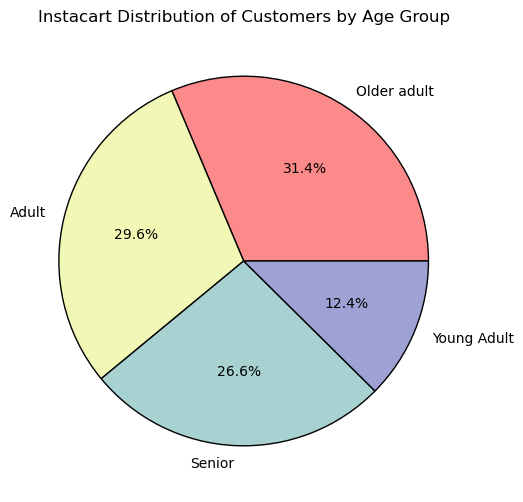

In [43]:
# Pie Chart
plt.figure(figsize=(6, 6)) # Control size of chart
plt.pie(age_group_counts, 
        labels = age_group_counts.index, 
        autopct='%.1f%%', # Show percentage to 1 d.p
        colors = ['#FD8A8A', '#F1F7B5', '#A8D1D1', '#9EA1D4'], # colour palette
        wedgeprops = {'edgecolor' : 'black'}) # boarders
plt.title('Instacart Distribution of Customers by Age Group') # title
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_age_groups_pie.png'), bbox_inches = 'tight') # Save
plt.show()

## 6.2. Income Groups

In [44]:
## Create a table of income_group counts
income_group_counts = user_sample['income_group'].value_counts()

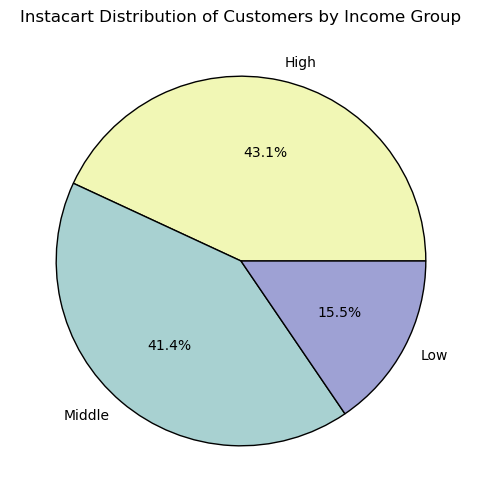

In [45]:
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(income_group_counts, 
        labels = income_group_counts.index, 
        autopct='%.1f%%',
        colors = ['#F1F7B5', '#A8D1D1', '#9EA1D4'],
        wedgeprops = {'edgecolor' : 'black'})
plt.title('Instacart Distribution of Customers by Income Group')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_income_groups_pie.png'), bbox_inches = 'tight')
plt.show()

## 6.3. Customers with Dependants

In [46]:
# create a table of dependants_flag counts
dependants_flag_counts = user_sample['dependants_flag'].value_counts()

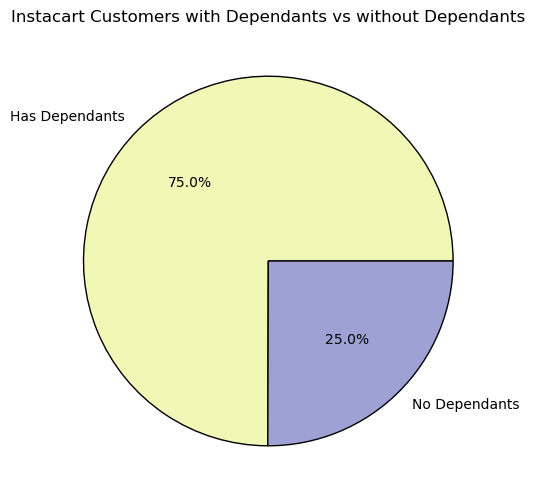

In [47]:
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(dependants_flag_counts, 
        labels = dependants_flag_counts.index, 
        autopct='%.1f%%', 
        colors = ['#F1F7B5', '#9EA1D4'],
        wedgeprops = {'edgecolor' : 'black'})
plt.title('Instacart Customers with Dependants vs without Dependants')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_dependants_pie.png'), bbox_inches = 'tight')
plt.show()

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

We'll analyze the usage frequency based on the days since the prior order and expenditure based on the prices columns. To ensure accuracy, we'll aggregate the data from the ords_prods_kept DataFrame so that each row represents a single order. This approach prevents averages from being skewed by customer orders comprising many items.

In [48]:
# Create aggregated subset of data where the 'prices' column is the total cost of each order:
orders_subset = ords_prods_all_kept.groupby(['user_id', 'age_group', 'income_group', 'dependants_flag', 'loyalty_flag', 'region', 'order_number', 'days_since_prior_order'])['prices'].sum().reset_index()

In [49]:
# Rename 'prices' to 'order_total'
orders_subset.rename(columns = {'prices' : 'order_total'}, inplace = True)

In [50]:
# Check subset
orders_subset

,user_id,age_group,income_group,dependants_flag,loyalty_flag,region,order_number,days_since_prior_order,order_total
0,1,Adult,Low,Has Dependants,New customer,South,2,15.0,35.4
1,1,Adult,Low,Has Dependants,New customer,South,3,21.0,28.2
2,1,Adult,Low,Has Dependants,New customer,South,4,29.0,26.0
3,1,Adult,Low,Has Dependants,New customer,South,5,28.0,57.0
4,1,Adult,Low,Has Dependants,New customer,South,6,19.0,25.0
...,...,...,...,...,...,...,...,...,...
2901748,99999,Adult,Middle,Has Dependants,Regular customer,Northeast,30,4.0,6.7
2901749,99999,Adult,Middle,Has Dependants,Regular customer,Northeast,31,8.0,25.1
2901750,99999,Adult,Middle,Has Dependants,Regular customer,Northeast,32,5.0,44.4
2901751,99999,Adult,Middle,Has Dependants,Regular customer,Northeast,33,6.0,41.2


## 7.1. Aggregations by Age Group

In [51]:
# max, min, mean by age category
aggregations_by_age_cat = orders_subset.groupby('age_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'order_total' : ['min', 'mean', 'max']})
# Check
aggregations_by_age_cat

days_since_prior_order                  order_total             \
                               min       mean   max         min       mean   
age_group                                                                    
Adult                          0.0  10.403753  30.0         0.0  79.015367   
Older adult                    0.0  10.382166  30.0         0.0  78.510199   
Senior                         0.0  10.372165  30.0         0.0  78.366813   
Young Adult                    0.0  10.380577  30.0         0.0  78.871569   

                     
                max  
age_group            
Adult         829.2  
Older adult  1092.2  
Senior        751.1  
Young Adult   842.1

## 7.2. Aggregations by Income Group

In [52]:
# max, min, mean by age category
aggregations_by_income_cat = orders_subset.groupby('income_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                                                        'order_total' : ['min', 'mean', 'max']})
# Check
aggregations_by_income_cat

days_since_prior_order                  order_total             \
                                min       mean   max         min       mean   
income_group                                                                  
High                            0.0  10.260991  30.0         0.0  83.756020   
Low                             0.0  11.070341  30.0         1.0  52.673028   
Middle                          0.0  10.290003  30.0         0.0  81.930008   

                      
                 max  
income_group          
High          1092.2  
Low            875.0  
Middle         852.5

Frequency: There is a general tendency for customers who earn less to shop less frequently.

Expenditure: Lower income customers, perhaps unsuprisingly, spend significantly less per order than customers in the middle and high income categories. There is no significant difference between customers in the middle and high income categories.

Frequency: Customers across all age groups tend to shop with similar frequency, with an average of approximately 10 days between orders. There is no significant difference in the days since prior order among the different age groups.

Expenditure: When it comes to expenditure, there is a noticeable pattern. Customers in the "Adult," "Older adult," "Senior," and "Young Adult" age groups all exhibit similar spending patterns, with mean order totals ranging from approximately $78 to $79. However, there is a slight increase in expenditure for "Young Adult" customers, with a mean order total of around $79. 

Overall, there is no substantial variation in expenditure across different age groups.

##  7.3. Aggregations by Dependants Category


In [53]:
# max, min, mean by dependants category
aggregations_by_dependants_cat = orders_subset.groupby('dependants_flag').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                                                               'order_total' : ['min', 'mean', 'max']})
# Check
aggregations_by_dependants_cat

days_since_prior_order                  order_total  \
                                   min       mean   max         min   
dependants_flag                                                       
Has Dependants                     0.0  10.388225  30.0         0.0   
No Dependants                      0.0  10.378169  30.0         0.0   

                                    
                      mean     max  
dependants_flag                     
Has Dependants   78.728425  1092.2  
No Dependants    78.482107   875.0

There is no significant difference between the shopping frequency or expenditure of customers with dependants and customers without dependants. Both groups have similar minimum, mean, and maximum values for days since the prior order and order total.

# 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

For this task, the customer profile variables will be compared across regions and department sales. However, other behaviours will be analysed in the supplementary section at the end of this script to answer key questions in the project brief. These behaviours will include the frequency/loyalty, product_prices, and order_totals.

In [54]:
# First, we'll need to get the names of each department back into the data:
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'))

In [55]:
# Check
df_dep

,department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,bulk,personal care,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [56]:
# Transpose:
df_dep_t = df_dep.T

In [57]:
# Create index
df_dep_t.reset_index(inplace = True)

In [58]:
# Copy row 0 into variable
new_header = df_dep_t.iloc[0]

In [59]:
# Remove row 0
df_dep_t = df_dep_t[1:]

In [60]:
# Assign header row
df_dep_t.columns = new_header

In [61]:
# Check code
df_dep_t

,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta
10,10,bulk


In [62]:
# Ensure department_id is int8 for merge with ords_prods_kept
df_dep_t['department_id'] = df_dep_t['department_id'].astype('int8')

In [63]:
# Merge on department_id
full_data = ords_prods_all_kept.merge(df_dep_t, on = 'department_id', indicator = 'merge1')

In [64]:
full_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,first_name,surname,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region,exclusion_flag,age_group,income_group,dependants_flag,department,merge1
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,High-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Keep,Senior,Low,Has Dependants,snacks,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,1,1,High-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Keep,Senior,Low,Has Dependants,snacks,both
2,4913,Table Water Crackers,78,19,4.4,894221,138,prior,23,5,13,24.0,3,0,High-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Keep,Senior,Low,Has Dependants,snacks,both
3,11759,Organic Simply Naked Pita Chips,107,19,4.4,1986630,138,prior,7,0,12,7.0,2,0,High-range product,Busiest day,Busiest days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Keep,Senior,Low,Has Dependants,snacks,both
4,13424,Almonds,45,19,4.2,3139998,138,prior,28,6,11,3.0,4,0,High-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Keep,Senior,Low,Has Dependants,snacks,both


In [65]:
# Check frequency of new merge flag to ensure it is the same as the number of rows in ords_prods_all_kept
full_data['merge1'].value_counts(dropna = False)

merge1
both          30964564
left_only            0
right_only           0
Name: count, dtype: int64

In [66]:
# Drop merge flag
full_data.drop('merge1', axis = 1, inplace = True)

# 8.1. Profile by Region

Summary of below findings: In all categories in each profiling variable, the count of customers in each category is proportionate between each region (there are no significant variations in the number of profiles that isn't simply caused by the different totals of customers in each region)

## 8.1.1. Income Groups

C:\Users\Sanket\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


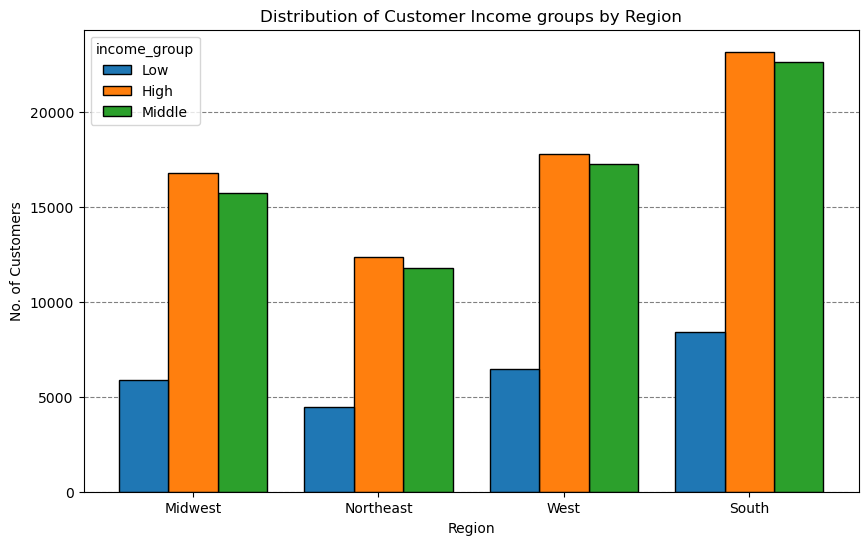

In [67]:
# A histogram could work to show the count of customers in each income group by region
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='region', hue='income_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Income groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_income_by_region.png'), bbox_inches = 'tight')
plt.show()

In [68]:
# Check above graph using crosstab
pd.crosstab(user_sample['income_group'], user_sample['region'], dropna = False)

region,Midwest,Northeast,South,West
income_group,,,,
High,16756,12369,23156,17799
Low,5891,4440,8403,6458
Middle,15729,11772,22634,17224


## 8.1.2. Age Groups

C:\Users\Sanket\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


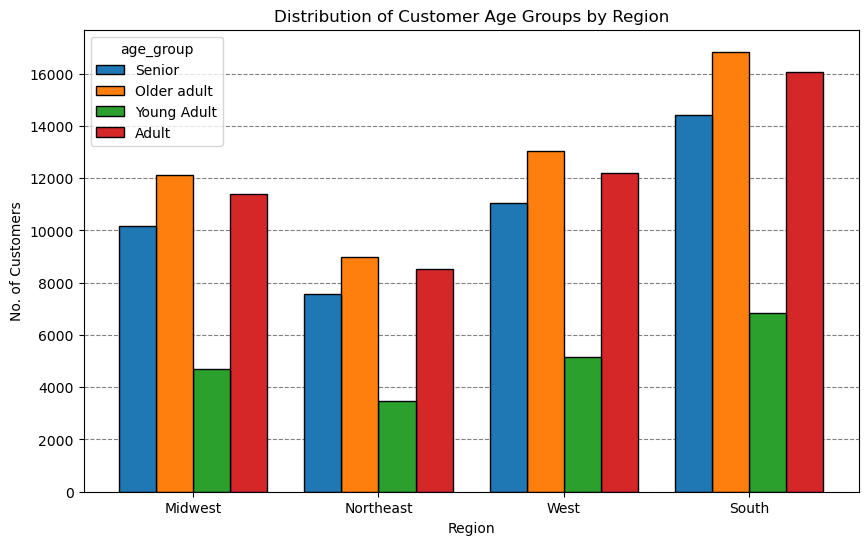

In [69]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='region', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Age Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_age_by_region.png'), bbox_inches = 'tight')
plt.show()

In [70]:
# Check above graph using crosstab
pd.crosstab(user_sample['age_group'], user_sample['region'], dropna = False)

region,Midwest,Northeast,South,West
age_group,,,,
Adult,11379,8527,16071,12214
Older adult,12119,9000,16839,13035
Senior,10169,7580,14433,11068
Young Adult,4709,3474,6850,5164


## 8.1.3. Dependants

C:\Users\Sanket\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


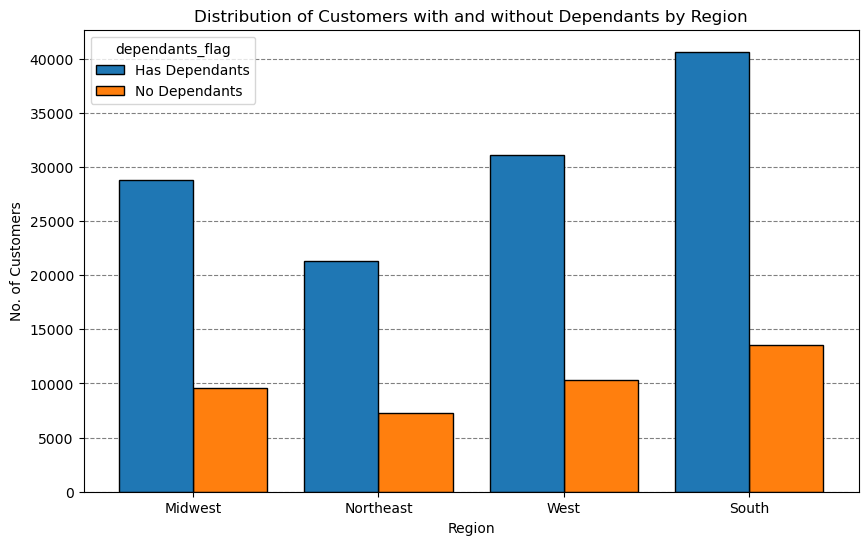

In [71]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='region', hue='dependants_flag', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customers with and without Dependants by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_dependants_by_region.png'), bbox_inches = 'tight')
plt.show()

In [72]:
# Check above graph using crosstab
pd.crosstab(user_sample['dependants_flag'], user_sample['region'], dropna = False)

region,Midwest,Northeast,South,West
dependants_flag,,,,
Has Dependants,28810,21326,40656,31112
No Dependants,9566,7255,13537,10369


## 8.2. Profiles by Department Sales

## 8.2.1. Income Groups

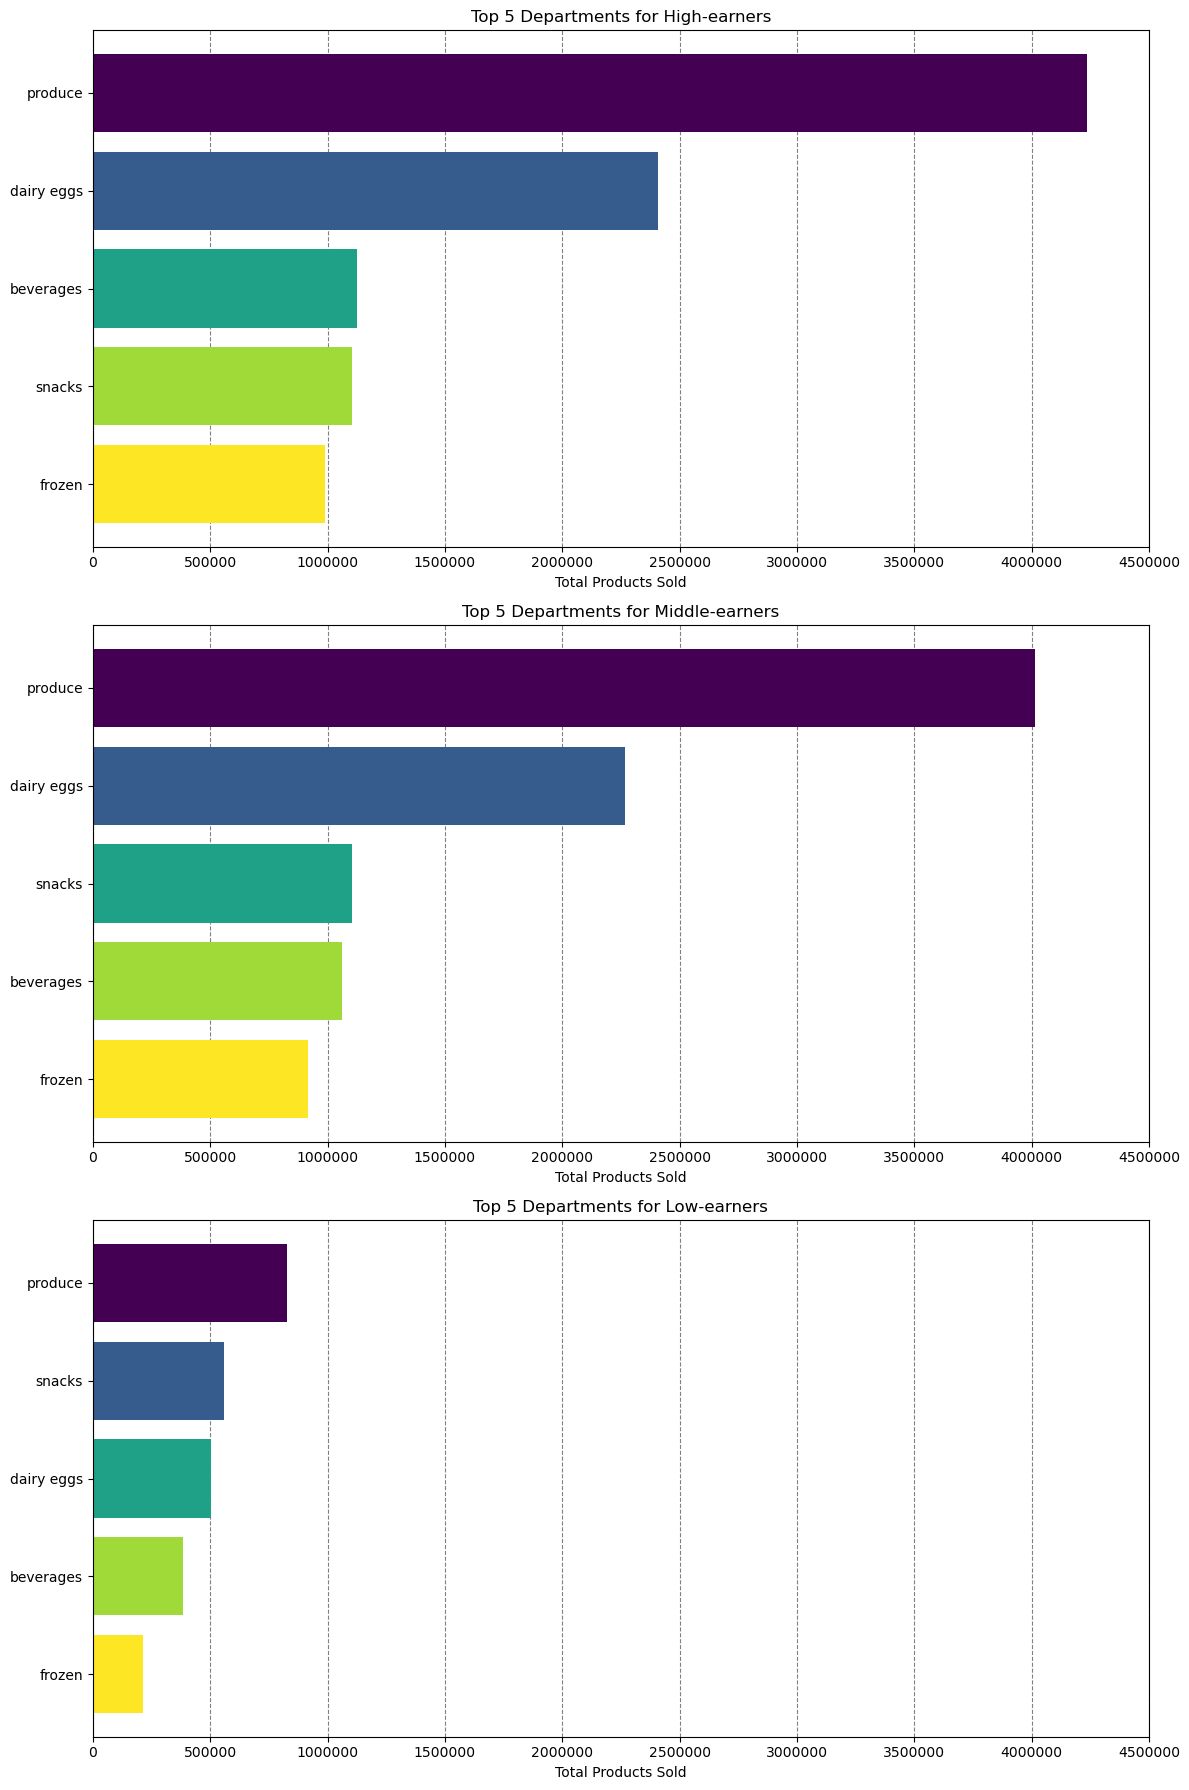

In [73]:
# Group by income_group and department, count occurrences, and sort
income_department_counts = full_data.groupby(['income_group', 'department']).size().reset_index(name='counts')
income_department_counts.sort_values(by=['income_group', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
colors = plt.cm.viridis(np.linspace(0, 2, 8))  # Sets colour palette

# Define the desired order of income groups
desired_order = ['High', 'Middle', 'Low']

# Iterate over each income group and create a horizontal bar chart
for i, income_group in enumerate(desired_order):
    income_data = income_department_counts[income_department_counts['income_group'] == income_group].head(5)
    ax = axs[i]
    ax.barh(income_data['department'], income_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {income_group}-earners')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 4500000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_top_departments_by_income_group.png'), bbox_inches = 'tight')
plt.show()

Note: Interesting that after "produce" the top departments differ between the income groups. Higher earners are more concerned with "dairy/eggs" whereas low-earners buy from "snacks" more often.

## 8.2.2. Age Groups

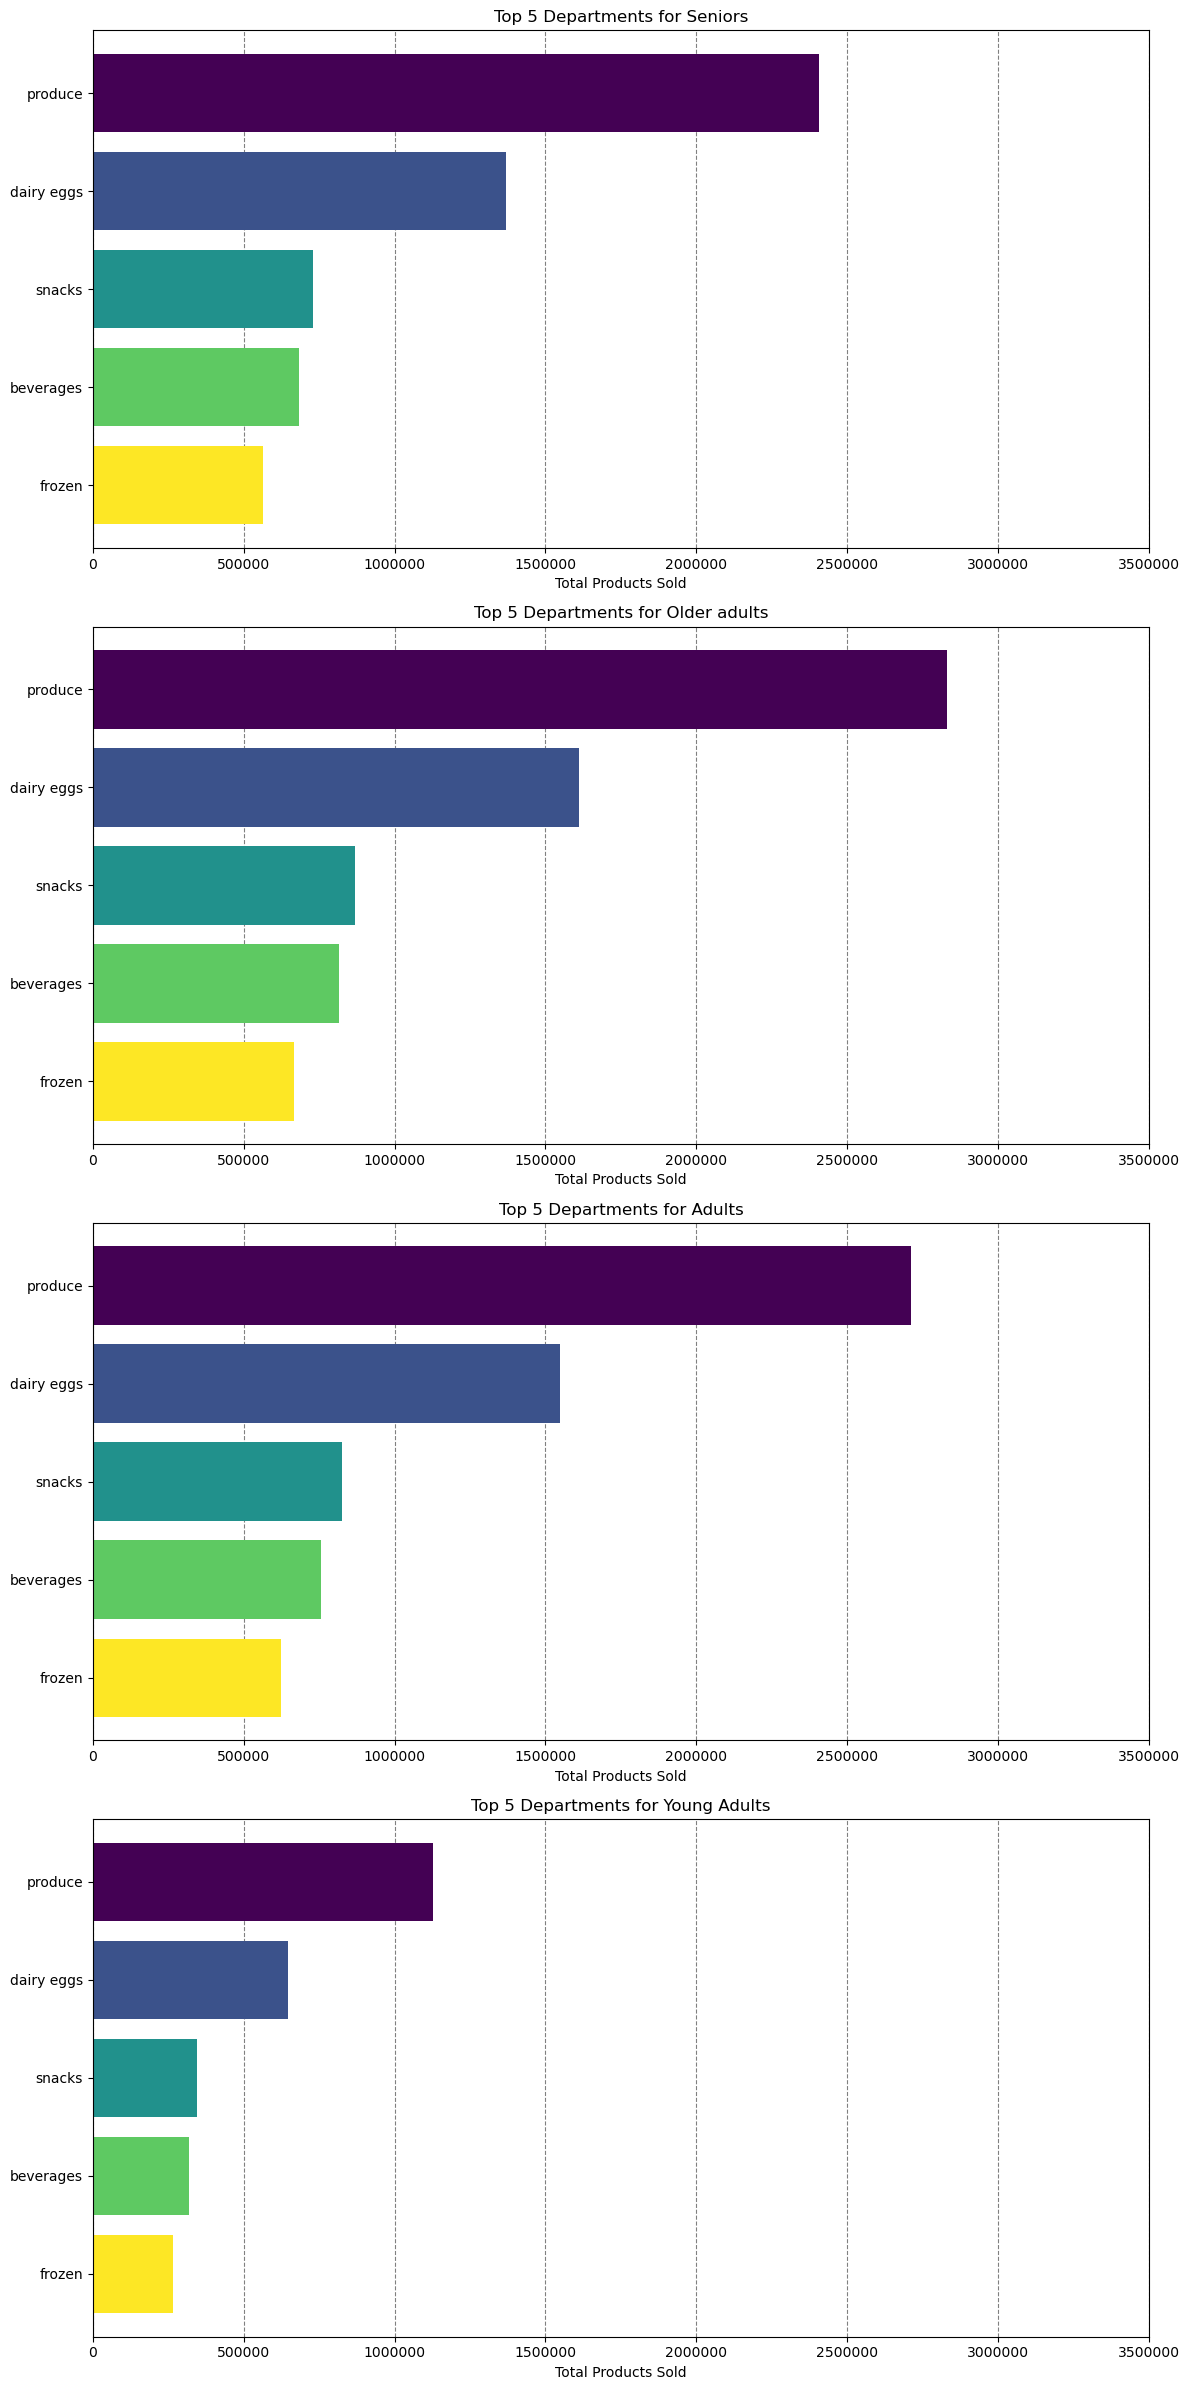

In [74]:
# Group by age_group and department, count occurrences, and sort
age_department_counts = full_data.groupby(['age_group', 'department']).size().reset_index(name='counts')
age_department_counts.sort_values(by=['age_group', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(4, 1, figsize=(12, 24))
colors = plt.cm.viridis(np.linspace(0, 1, 5))  # Sets colour palette

# Define the desired order of age groups
desired_age_order = ['Senior', 'Older adult', 'Adult', 'Young Adult']

# Iterate over each age group and create a horizontal bar chart
for i, age_group in enumerate(desired_age_order):
    age_data = age_department_counts[age_department_counts['age_group'] == age_group].head(5)
    ax = axs[i]
    ax.barh(age_data['department'], age_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {age_group}s')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 3500000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_top_departments_by_age_group.png'), bbox_inches = 'tight')
plt.show()

 Strangely, different age groups don't show any differences between the departments they purchase the most products from.

## 8.2.3. Dependants

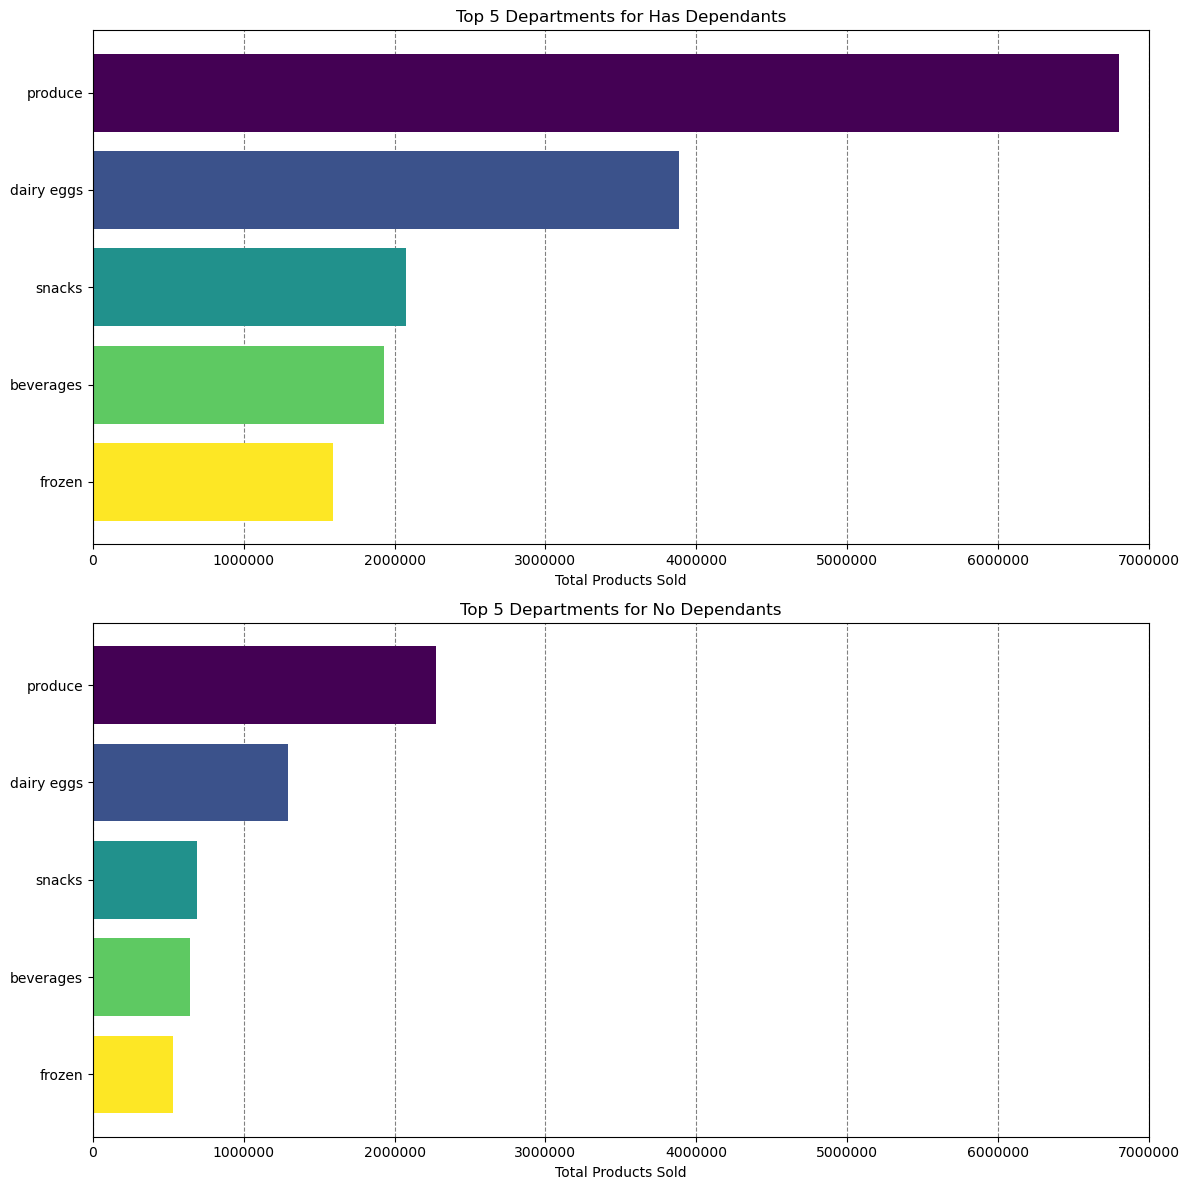

In [75]:
# Group by dependants_flag and department, count occurrences, and sort
dependants_department_counts = full_data.groupby(['dependants_flag', 'department']).size().reset_index(name='counts')
dependants_department_counts.sort_values(by=['dependants_flag', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
colors = plt.cm.viridis(np.linspace(0, 1, 5))  # Sets colour palette

# Define the desired order of age groups
dependants_order = ['Has Dependants', 'No Dependants']

# Iterate over both dependants_flags and create a horizontal bar chart
for i, dependants_status in enumerate(dependants_order):
    dependants_data = dependants_department_counts[dependants_department_counts['dependants_flag'] == dependants_status].head(5)
    ax = axs[i]
    ax.barh(dependants_data['department'], dependants_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {dependants_status}')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 7000000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_top_departments_by_dependants.png'), bbox_inches = 'tight')
plt.show()

 Surprisingly, top departments are consistent between these groups with a roughly proportional number of products purchased in each department

# 9. Visualisations

All visualisations have been exported throughout the script

# 10. Export Final Data Set

In [76]:
full_data.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_full_data.pkl'))

# 11. Supplementary Analysis

The following visualisations have been generated to answer key questions from the project brief which have either not been covered or require supporting evidence

## 11.1. Are there certain types of products that are more popular than others?

A simple horizontal bar chart showing the overall top 10 departments for instacart would be a better choice.

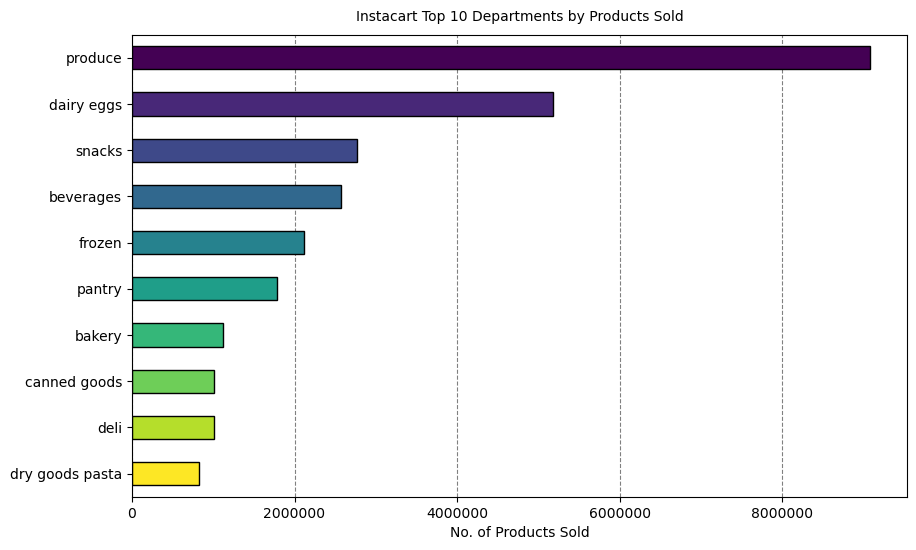

In [77]:
colors = plt.cm.viridis(np.linspace(0, 1, 10)) # Sets colour palette

fig, ax = plt.subplots(figsize = (10, 6))
plt.ticklabel_format(style='plain')

full_data['department'].value_counts().sort_values(ascending = False).head(10).plot.barh(color = colors, 
                                                                                        zorder = 2, 
                                                                                        edgecolor = 'black')
plt.title('Instacart Top 10 Departments by Products Sold', size=10, pad=10)
plt.xlabel('No. of Products Sold', )
plt.ylabel('')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
ax.invert_yaxis()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Instacart_department_sales.png'), bbox_inches = 'tight')

In [78]:
# A simple frequency count to show all departments may also provide useful insights
# Some departments may benefit from a boost in marketing
full_data['department'].value_counts(dropna=False)

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

## 11.2. Are there differences in ordering habits based on a customer's loyalty status?

Analyse the average order total of customers from different loyalty groups using orders_subset from part 7

In [79]:
# Compute average order_total
loyalty_avg_order_total = orders_subset.groupby('loyalty_flag')['order_total'].mean().sort_values(ascending = False).reset_index()

In [80]:
# Check
loyalty_avg_order_total

,loyalty_flag,order_total
0,Regular customer,79.666268
1,Loyal customer,77.887735
2,New customer,77.014072


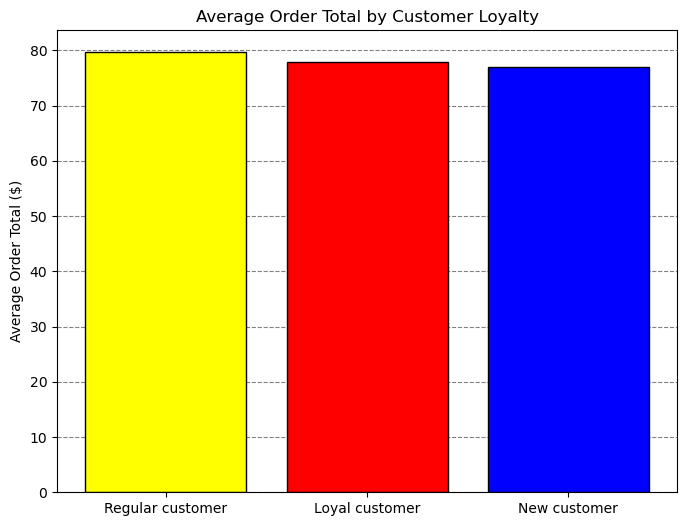

In [81]:
# Set up formatting and colours
plt.figure(figsize=(8, 6))
colors = ['yellow', 'red', 'blue']

# Plot bars
bars = plt.bar(loyalty_avg_order_total['loyalty_flag'], loyalty_avg_order_total['order_total'], color=colors, edgecolor='black', zorder=2)
plt.title("Average Order Total by Customer Loyalty")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Order Total ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_average_order_by_loyalty.png'), bbox_inches = 'tight')

Analyse the average product price for each loyalty grouping using full_data

In [82]:
# Compute average price of products bought
product_avg_cost = full_data.groupby('loyalty_flag')['prices'].mean().sort_values(ascending = False).reset_index()

In [83]:
# Check
product_avg_cost

,loyalty_flag,prices
0,New customer,7.801665
1,Regular customer,7.798262
2,Loyal customer,7.773575


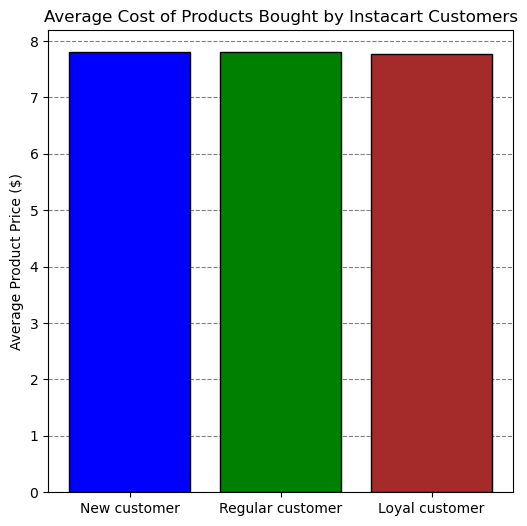

In [84]:
# Set up formatting and colours
plt.figure(figsize=(6, 6))
colors = ['blue', 'green', 'brown']

# Plot bars
bars = plt.bar(product_avg_cost['loyalty_flag'], product_avg_cost['prices'], color=colors, edgecolor='black', zorder=2)
plt.title("Average Cost of Products Bought by Instacart Customers")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Product Price ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_average_product_price_by_loyalty.png'), bbox_inches = 'tight')

## 11.3. "Are there differences in ordering habits based on a customer's region"?

Total product orders:

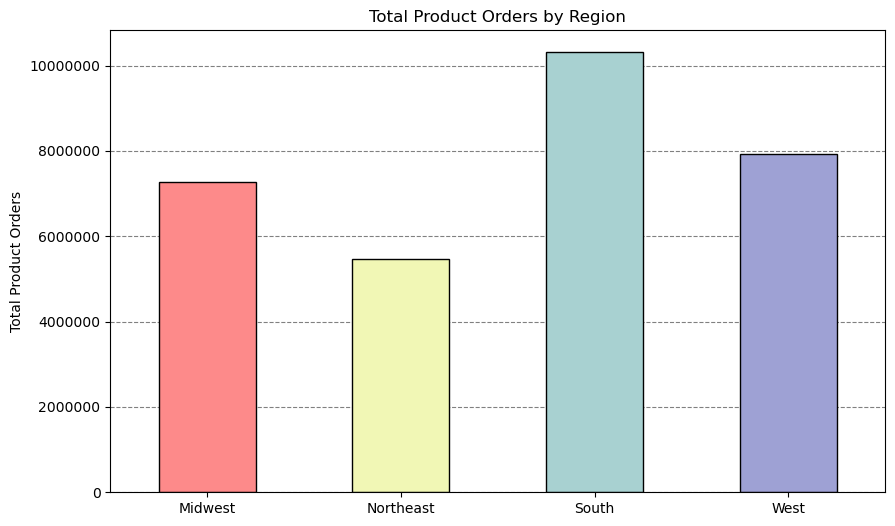

In [85]:
# Set up formatting
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')

# Plot bars
full_data['region'].value_counts().sort_index().plot.bar(color = ['#FD8A8A', '#F1F7B5', '#A8D1D1', '#9EA1D4'],
                                                         edgecolor='black', 
                                                         zorder=2, 
                                                         alpha = 1)
plt.title("Total Product Orders by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Total Product Orders")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_total_orders_by_region.png'), bbox_inches = 'tight')

Analyse average order total

In [86]:
# Compute average order_total
region_avg_order_total = orders_subset.groupby('region')['order_total'].mean().sort_values(ascending = False).reset_index()

In [87]:
# Check
region_avg_order_total

,region,order_total
0,West,78.789117
1,Northeast,78.669166
2,South,78.626731
3,Midwest,78.588262


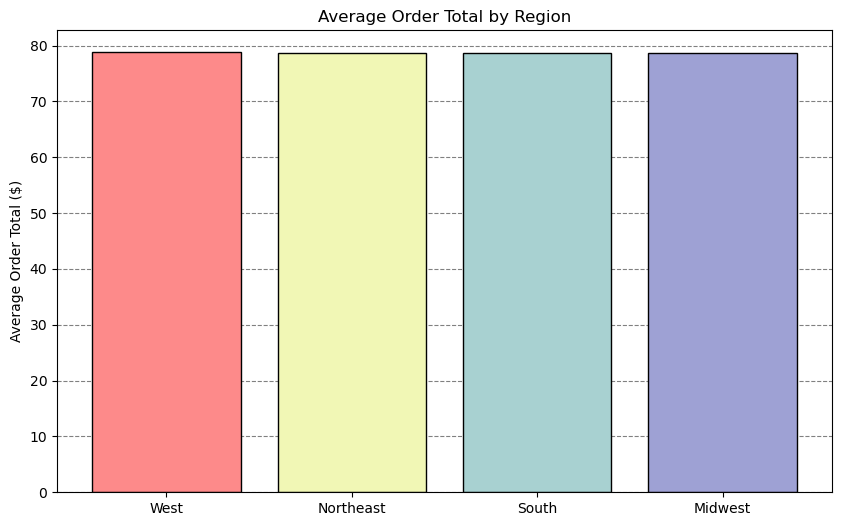

In [88]:
# Set up formatting
plt.figure(figsize=(10, 6))

# Plot bars
bars = plt.bar(region_avg_order_total['region'], 
               region_avg_order_total['order_total'], 
               color = ['#FD8A8A', '#F1F7B5', '#A8D1D1', '#9EA1D4'],
               edgecolor='black', 
               zorder=2, 
               alpha = 1)
plt.title("Average Order Total by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Order Total ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_average_order_by_region.png'), bbox_inches = 'tight')

# 11.4. What differences can you find in ordering habits of different customer profiles?

Since the crosstabs in section 7 largely address this topic, I'll focus on creating a visualization for the income groups to highlight the differences in order frequency and average order total. As for the age and dependents profiles, they won't be investigated further at this time because their ordering habits are very similar.

In [89]:
# Sort income groups by the mean of the order_total (keep in mind this is a multilevel index)
sorted_df = aggregations_by_income_cat.sort_values(by=('order_total', 'mean'), ascending=False)

In [90]:
# Check
sorted_df

days_since_prior_order                  order_total             \
                                min       mean   max         min       mean   
income_group                                                                  
High                            0.0  10.260991  30.0         0.0  83.756020   
Middle                          0.0  10.290003  30.0         0.0  81.930008   
Low                             0.0  11.070341  30.0         1.0  52.673028   

                      
                 max  
income_group          
High          1092.2  
Middle         852.5  
Low            875.0

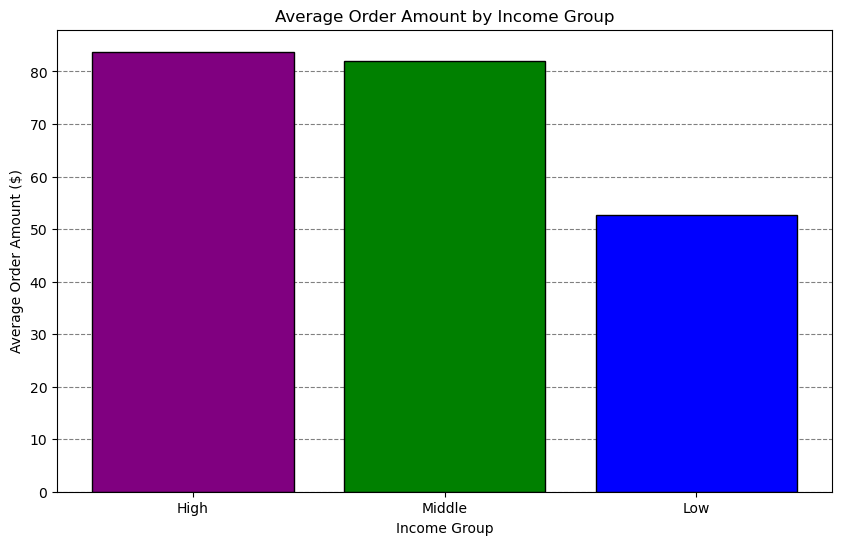

In [91]:
# Make bar chart for average order total
plt.figure(figsize=(10, 6))
plt.bar(sorted_df.index, sorted_df['order_total', 'mean'], color=['purple', 'green', 'blue'], zorder=2, edgecolor='black')
plt.xlabel('Income Group')
plt.ylabel('Average Order Amount ($)')
plt.title('Average Order Amount by Income Group')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_average_order_amount_by_income.png'), bbox_inches = 'tight')

### Creating Frequency_flag, merging it in user_sample and then generating cross-tabulation

In [116]:
# Calculate median_days_between_orders for each user
median_days_between_orders = ords_prods_all_kept.groupby('user_id')['days_since_prior_order'].median().reset_index(name='median_days_between_orders')

# Merge median_days_between_orders with user_sample DataFrame
user_sample = pd.merge(user_sample, median_days_between_orders, on='user_id', how='left')

# Define frequency_flag based on median_days_between_orders
conditions = [
    (user_sample['median_days_between_orders'] <= 10),
    (user_sample['median_days_between_orders'] > 10) & (user_sample['median_days_between_orders'] <= 20),
    (user_sample['median_days_between_orders'] > 20)
]
choices = ['High', 'Medium', 'Low']

user_sample['frequency_flag'] = pd.cut(user_sample['median_days_between_orders'], bins=[-float('inf'), 10, 20, float('inf')], labels=['High', 'Medium', 'Low'])

# Generate cross-tabulation
crosstab1 = pd.crosstab(user_sample['income_group'], user_sample['frequency_flag'], dropna=False)

print(crosstab1)

frequency_flag     High   Medium      Low
income_group                             
High            9779323  3137203  1290502
Low             2199082   787334   376138
Middle          9226071  2940576  1228335


In [117]:
# Check
crosstab1

frequency_flag,High,Medium,Low
income_group,,,
High,9779323,3137203,1290502
Low,2199082,787334,376138
Middle,9226071,2940576,1228335


In [118]:
# Normalise
crosstab1_norm = crosstab1.div(crosstab1.sum(axis=1), axis = 0) * 100
# Check
crosstab1_norm

frequency_flag,High,Medium,Low
income_group,,,
High,68.834404,22.082050,9.083547
Low,65.399158,23.414762,11.186081
Middle,68.877069,21.952818,9.170113


<Figure size 800x1000 with 0 Axes>

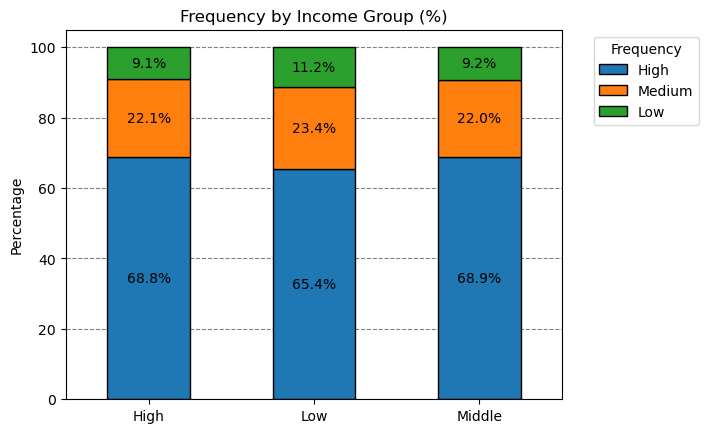

In [119]:
# Graph
plt.figure(figsize=(8, 10)) 
ax = crosstab1_norm.plot(kind='bar', stacked=True, zorder=2, edgecolor='black')

# To show percentages on each section:
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = f'{height:.1f}%'  # Format as percentage
    ax.text(x + width / 2, y + height / 2, percentage, ha='center', va='center')

plt.title('Frequency by Income Group (%)')
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.legend(title='Frequency',loc='upper left', bbox_to_anchor=(1.05, 1))
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'instacart_customer_frequency_by_income.png'), bbox_inches = 'tight')